<a href="https://colab.research.google.com/github/KeerthanaRajaR/Linear_Algebra_The_Coding_Way/blob/main/Diagnalization/Diagonalization_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
from IPython.display import Image

uploaded=files.upload()

Saving ass2.jpg to ass2.jpg


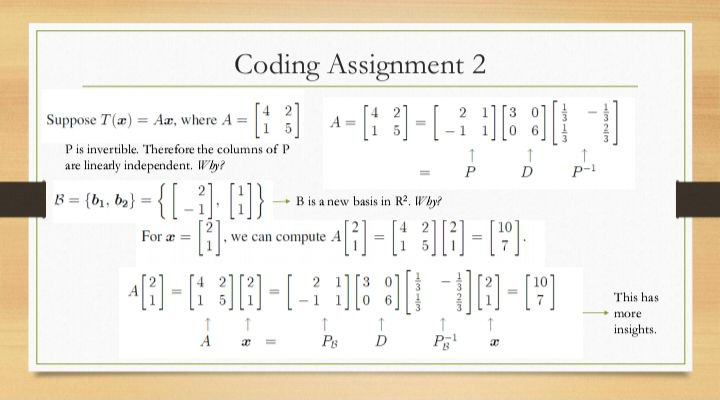

In [7]:
Image('ass2.jpg',
      width=650)


In [8]:
uploaded=files.upload()

Saving ass2.1.jpg to ass2.1.jpg


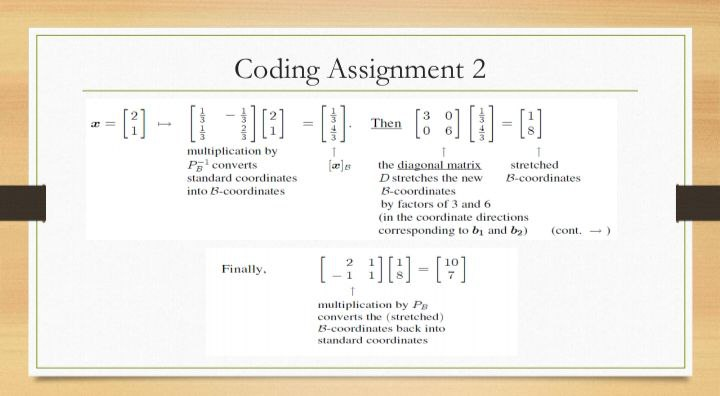

In [9]:
Image('ass2.1.jpg',
      width=650)

In [10]:
uploaded=files.upload()

Saving asss2.2.jpg to asss2.2.jpg


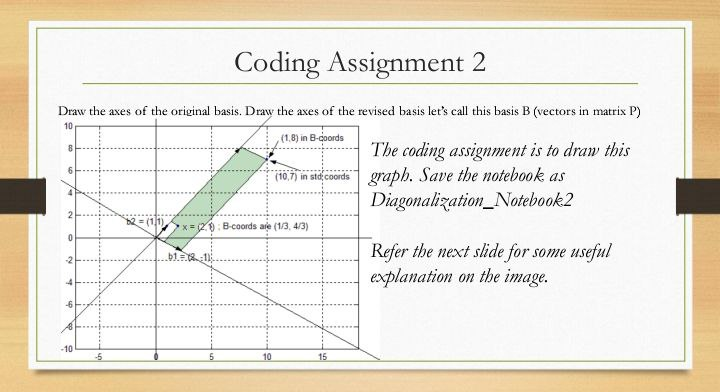

In [15]:
Image('asss2.2.jpg',
      width=650)

In [13]:
uploaded=files.upload()

Saving ass2.3.jpg to ass2.3.jpg


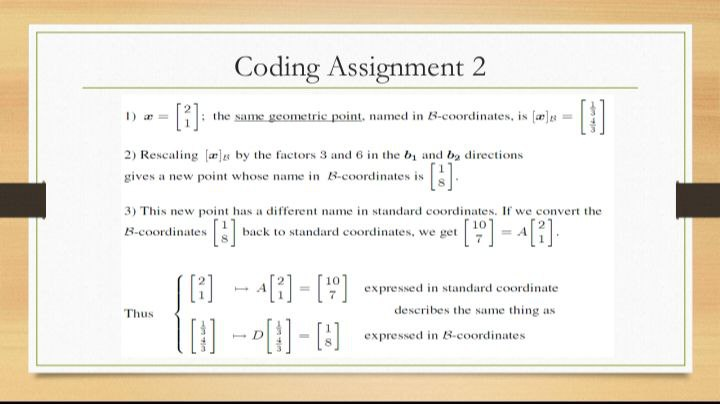

In [14]:
Image('ass2.3.jpg',
      width=650)


Matrix P
 Matrix([[-1, 1], [2, 1]])

Matrix D
 Matrix([[2, 0], [0, 5]])

Matrix P after modification
 Matrix([[1, 1], [-2, 1]])

Matrix P_inverse
 Matrix([[1/3, -1/3], [2/3, 1/3]])


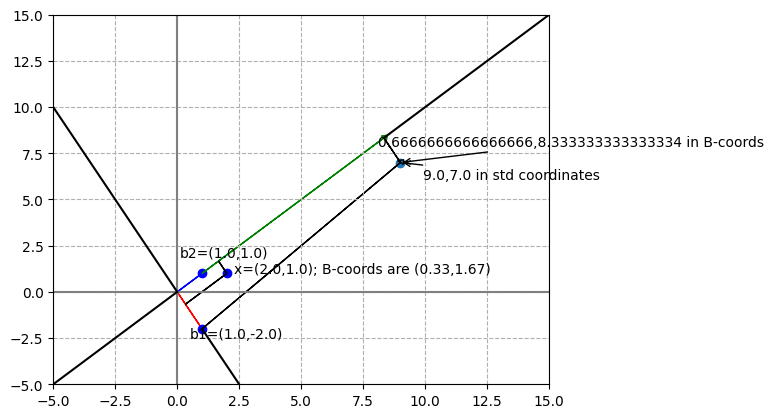

In [5]:

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

def Diagonalize(A):
    # find the matrices P and D using diagonalize() of sympy module
    P, D = A.diagonalize()
    print('\nMatrix P\n',P)
    print('\nMatrix D\n',D)
    P[0] = -P[0]
    P[2] = -P[2]
    print('\nMatrix P after modification\n',P)

    # find the P_inverse using inv() of sympy module
    P_inv = P.inv()
    print('\nMatrix P_inverse\n',P_inv)

    return P, D, P_inv

def plot_graph(P, D, P_inv, x):
    fig, ax = plt.subplots()

    # Highlight x and y axis
    ax.axhline(color='gray') # x-axis
    ax.axvline(color='gray') # y-axis

    # Extract the basis vectors b1 and b2 from matrix P
    b1 = P.col(0)
    b2 = P.col(1)

    # find the standard coordinates
    standard_coordinates = P @ D @ P_inv @ x

    # find the basis coordinates
    basis_coordinates = P_inv @ x

    # find the stretched basis coordinates
    stretched_basis_coordinates = D @ basis_coordinates

    # Plot the basis vector b1
    ax.arrow(0, 0, float(b1[0]), float(b1[1]), head_width=0.3, head_length=0.2, facecolor='red', edgecolor='red')
    ax.scatter(float(b1[0]), float(b1[1]), color='blue')

    # Plot the basis vector b2
    ax.arrow(0, 0, float(b2[0]), float(b2[1]), head_width=0.3, head_length=0.2, facecolor='blue', edgecolor='blue')
    ax.scatter(float(b2[0]), float(b2[1]), color='blue')

    # Plot vector x
    ax.scatter(float(x[0]), float(x[1]), color='blue')

    # Plot the standard coordinates
    ax.scatter(float(standard_coordinates[0]), float(standard_coordinates[1]))

    # find basis_coordinates with respect to b1 and b2
    basis_coordinates_along_b1 = b1 * basis_coordinates[0]
    basis_coordinates_along_b2 = b2 * basis_coordinates[1]

    # find stretched_basis_coordinates with respect to b1 and b2
    stretched_basis_coordinates_along_b1 = b1 * stretched_basis_coordinates[0]
    stretched_basis_coordinates_along_b2 = b2 * stretched_basis_coordinates[1]

    # Plot basis_coordinates and stretched_basis_coordinates
    ax.arrow(float(b2[0]), float(b2[1]), float(stretched_basis_coordinates_along_b2[0]) - float(b2[0]),
             float(stretched_basis_coordinates_along_b2[1]) - float(b2[1]), head_width=0.3, head_length=0.2, facecolor='green', edgecolor='green')

    ax.arrow(float(b1[0]), float(b1[1]), float(standard_coordinates[0]) - float(b1[0]),
             float(standard_coordinates[1]) - float(b1[1]), head_width=0.3, head_length=0.2)

    ax.arrow(float(basis_coordinates_along_b1[0]), float(basis_coordinates_along_b1[1]),
             float(x[0]) - float(basis_coordinates_along_b1[0]), float(x[1]) - float(basis_coordinates_along_b1[1]))

    ax.arrow(float(basis_coordinates_along_b2[0]), float(basis_coordinates_along_b2[1]),
             float(x[0]) - float(basis_coordinates_along_b2[0]), float(x[1]) - float(basis_coordinates_along_b2[1]))

    ax.arrow(float(stretched_basis_coordinates_along_b2[0]), float(stretched_basis_coordinates_along_b2[1]),
             float(standard_coordinates[0]) - float(stretched_basis_coordinates_along_b2[0]),
             float(standard_coordinates[1]) - float(stretched_basis_coordinates_along_b2[1]))

    # Annotate the plots
    ax.annotate(f'b1=({float(b1[0])},{float(b1[1])})', xy=(float(b1[0]), float(b1[1])), xytext=(float(b1[0])-.5, float(b1[1])-.5))
    ax.annotate(f'b2=({float(b2[0])},{float(b2[1])})', xy=(float(b2[0]), float(b2[1])), xytext=(float(b2[0])-.9, float(b2[1])+.9))
    ax.annotate(f'x=({float(x[0])},{float(x[1])}); B-coords are ({round(float(basis_coordinates[0]),2)},{round(float(basis_coordinates[1]),2)})',
                xy=(float(x[0]), float(x[1])), xytext=(float(x[0])+.3, float(x[1])))
    ax.annotate(f'{float(standard_coordinates[0])},{float(standard_coordinates[1])} in std coordinates',
                xy=(float(standard_coordinates[0]), float(standard_coordinates[1])),
                xytext=(float(standard_coordinates[0])+.9, float(standard_coordinates[1])-.9),
                arrowprops=dict(arrowstyle='->'))
    ax.annotate(f'{float(stretched_basis_coordinates[0])},{float(stretched_basis_coordinates[1])} in B-coords',
                xy=(float(standard_coordinates[0]), float(standard_coordinates[1])),
                xytext=(float(standard_coordinates[0])-.9, float(standard_coordinates[1])+.9),
                arrowprops=dict(arrowstyle='->'))

    # Extend b1 and b2
    b2_positive_y_axis = 15 * b2
    b2_positive_y_axis_x_points = np.array([float(stretched_basis_coordinates_along_b2[0]), float(b2_positive_y_axis[0])])
    b2_positive_y_axis_y_points = np.array([float(stretched_basis_coordinates_along_b2[1]), float(b2_positive_y_axis[1])])
    ax.plot(b2_positive_y_axis_x_points, b2_positive_y_axis_y_points, color='black')

    b2_negative_y_axis = -5 * b2
    b2_negative_y_axis_x_points = np.array([0, float(b2_negative_y_axis[0])])
    b2_negative_y_axis_y_points = np.array([0, float(b2_negative_y_axis[1])])
    ax.plot(b2_negative_y_axis_x_points, b2_negative_y_axis_y_points, color='black')

    b1_positive_x_axis = 15 * b1
    b1_positive_x_axis_x_points = np.array([float(b1[0]), float(b1_positive_x_axis[0])])
    b1_positive_x_axis_y_points = np.array([float(b1[1]), float(b1_positive_x_axis[1])])
    ax.plot(b1_positive_x_axis_x_points, b1_positive_x_axis_y_points, color='black')

    b1_negative_x_axis = -5 * b1
    b1_negative_x_axis_x_points = np.array([0, float(b1_negative_x_axis[0])])
    b1_negative_x_axis_y_points = np.array([0, float(b1_negative_x_axis[1])])
    ax.plot(b1_negative_x_axis_x_points, b1_negative_x_axis_y_points, color='black')

    # set x and y limit
    ax.set_xlim(-5, 15)
    ax.set_ylim(-5, 15)

    # display the graph
    plt.grid(linestyle='--')
    plt.show()

# Example usage
A = sp.Matrix([[4, 1], [2, 3]])
x = sp.Matrix([2, 1])

P, D, P_inv = Diagonalize(A)
plot_graph(P, D, P_inv, x)
